In [1]:
import numpy as np
import pandas as pd
import yellowbrick as yb
import matplotlib.pyplot as plt
import seaborn as sns

dados = pd.read_csv('flights.csv')

# Espaço Schengen: O Espaço Schengen é uma área geográfica que engloba a maioria dos países europeus, onde os controles de fronteira foram eliminados para permitir a livre circulação de pessoas entre os países membros. Essa área é denominada em referência ao Acordo de Schengen, assinado em 1985 na vila de Schengen, em Luxemburgo, e implementado em 1995.

       schengen      delay
0  non-schengen  15.350827
1      schengen  10.665156


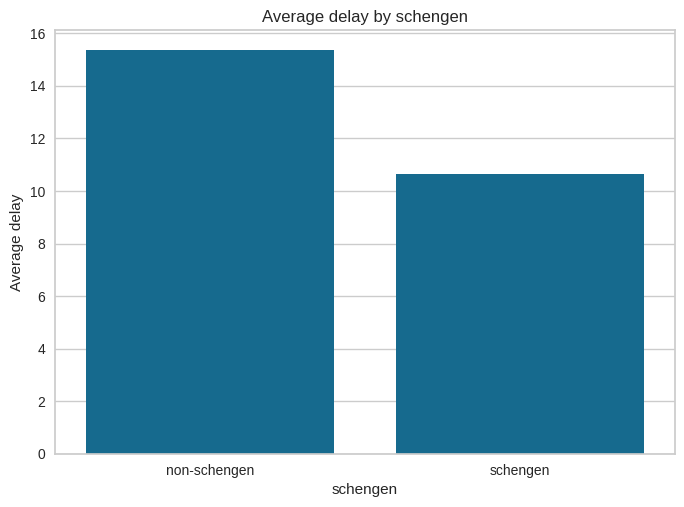

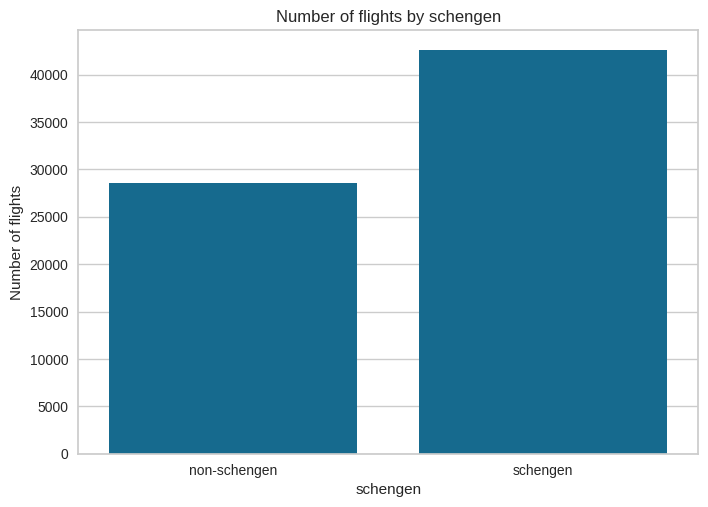

In [2]:
average_delay = dados.groupby('schengen')['delay'].mean().reset_index()
print(average_delay)
sns.barplot(x='schengen', y='delay', data=average_delay)
plt.title('Average delay by schengen')
plt.xlabel('schengen')
plt.ylabel('Average delay')
plt.show()

sns.countplot(x='schengen', data=dados)
plt.title('Number of flights by schengen')
plt.xlabel('schengen')
plt.ylabel('Number of flights')
plt.show()

   is_holiday      delay
0       False  10.835677
1        True  42.092465


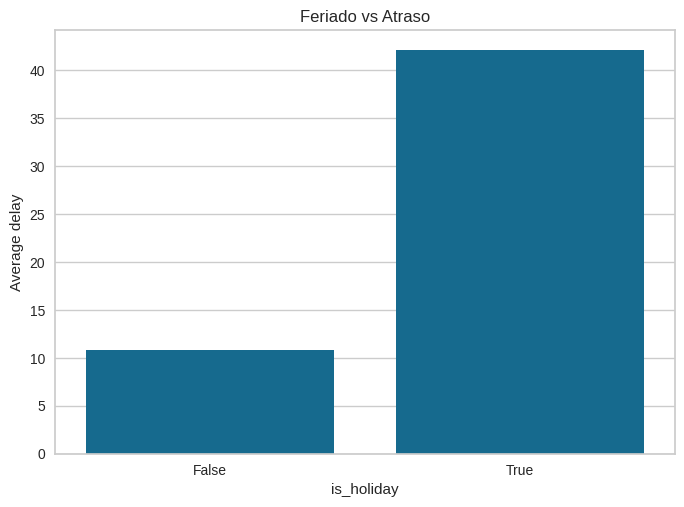

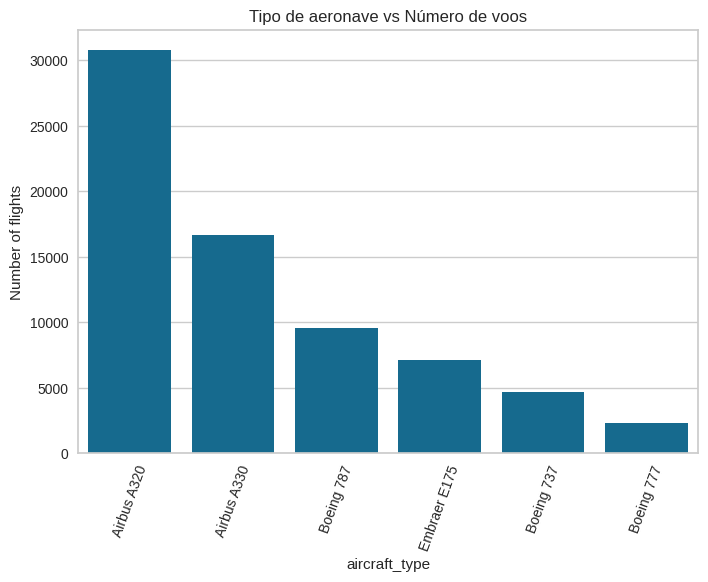

In [3]:
average_delay = dados.groupby('is_holiday')['delay'].mean().reset_index()
print(average_delay)
sns.barplot(x='is_holiday', y='delay', data=average_delay)
plt.title('Feriado vs Atraso')
plt.xlabel('is_holiday')
plt.ylabel('Average delay')
plt.show()

order = dados['aircraft_type'].value_counts().index
sns.countplot(x='aircraft_type', data=dados, order=order)
plt.title('Tipo de aeronave vs Número de voos')
plt.xticks(rotation=70)
plt.xlabel('aircraft_type')
plt.ylabel('Number of flights')
plt.show()

# Regra Freedman-Diaconis
Um regra usada em análise e estatística, para selecionar a largura dos compartimentos a serem usados em um histograma, ou seja a largura das barras no exemplo a seguir.

Largura do Bin = 2xIQR(x)/raizCúbica de n.

IQR é o intevalo interquartil dos dados e n é o número de observações na amostra x.

<Axes: xlabel='arrival_time', ylabel='Count'>

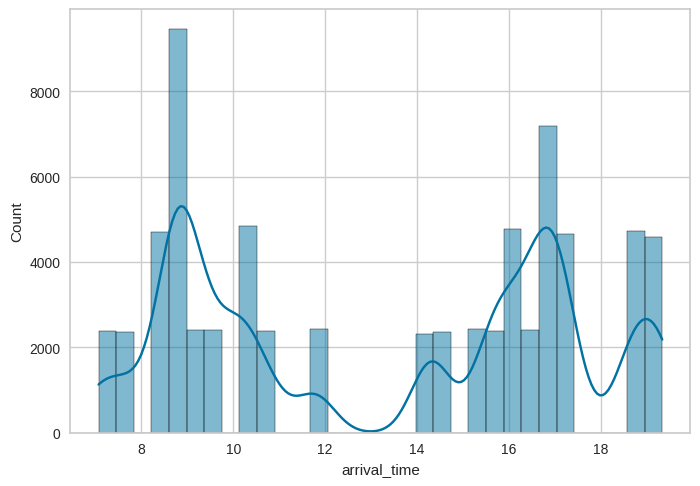

In [4]:
import numpy as np 

def calcularLarguraBin(dados, coluna):
    Q75, Q25 = np.percentile(dados[coluna], [75 ,25])
    IQR = Q75 - Q25
    larguraBin = 2 * IQR * np.power(len(dados[coluna]), -1/3)
    return larguraBin

sns.histplot(data=dados, x='arrival_time', kde=True, binwidth=calcularLarguraBin(dados, 'arrival_time'))

<Axes: xlabel='arrival_time', ylabel='Count'>

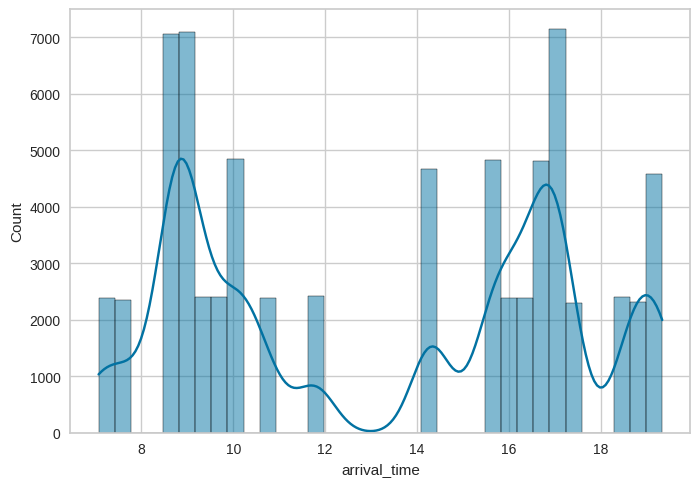

In [5]:
import numpy as np 

def calcularLarguraBin(dados, coluna):
    Q75, Q25 = np.percentile(dados[coluna], [75 ,25])
    IQR = Q75 - Q25
    larguraBin = 2 * IQR * np.power(len(dados[coluna]), -1/3)
    return larguraBin

sns.histplot(data=dados, x='arrival_time', kde=True, binwidth=calcularLarguraBin(dados, 'departure_time'))

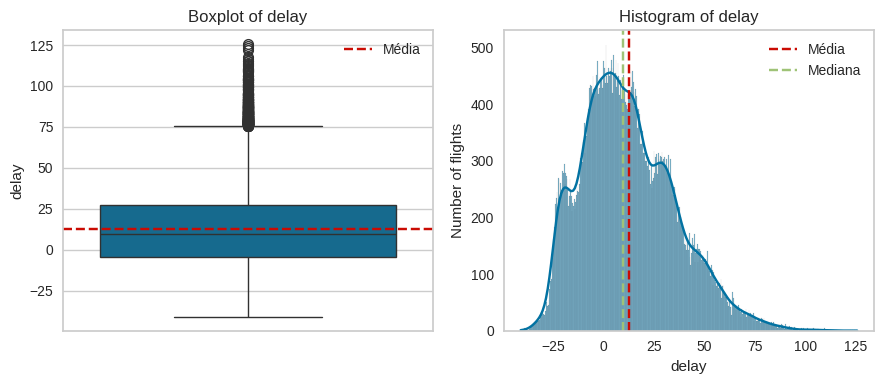

In [6]:
mean_delay = dados['delay'].mean()
median_delay = dados['delay'].median()

fig, axes = plt.subplots(1, 2, figsize=(9, 4))

sns.boxplot(y='delay', data=dados, ax=axes[0])
axes[0].set_title('Boxplot of delay')

axes[0].axhline(mean_delay, color='r', linestyle='--', label='Média')
axes[0].legend()

largura_bin_delay = calcularLarguraBin(dados, 'departure_time')
sns.histplot(data=dados, x='delay', kde=True, ax=axes[1], binwidth=largura_bin_delay)
plt.ylabel('Number of flights')
plt.grid(False)
axes[1].set_title('Histogram of delay')

axes[1].axvline(mean_delay, color='r', linestyle='--', label='Média')
axes[1].axvline(median_delay, color='g', linestyle='--', label='Mediana')
axes[1].legend()

plt.tight_layout()
plt.show()

# Box Plot -> quartis do dataset

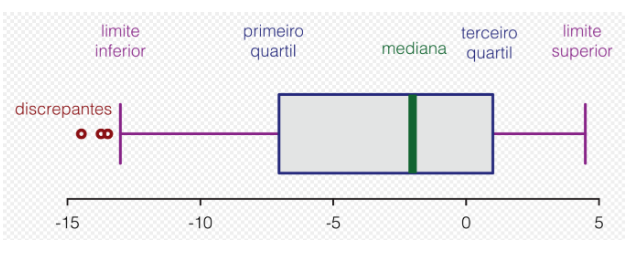

* O limite inferior é o valor mínimo que um dado pode ter sem ser considerado um valor atípico (outlier).
* O primeiro quartil (Q1) é o valor que divide os dados em 25% abaixo e 75% acima dele. Ou seja, 25% dos dados estão abaixo do Q1 e 75% estão acima.
* A mediana é o valor que divide os dados em 50% abaixo e 50% acima dele.
* O terceiro quartil (Q3) é o valor que divide os dados em 75% abaixo e 25% acima dele. Ou seja, 75% dos dados estão abaixo do Q3 e 25% estão acima.
* O limite superior é o valor máximo que um dado pode ter sem ser considerado um valor atípico. Ele é calculado como Q3 + 1,5 x IQR.

# Começando a classificação dos dados
## Objetivo :
* Tratamento de dados para inserção no modelo de Machine Learning

#### Atribuindo à coluna 'Date' a soma da coluna 'Year' + 'Day', porém a formatação da coluna 'Day' deve ser garantida. Na base de dados original, 'Day' está começando em 0 até 364, referindo ao primeiro dia do ano e último fim do ano. Logo, soma + 1 para termos os 365 dias.

In [7]:
dados['date'] = pd.to_datetime(dados['year'].astype(str) + '-' + (dados['day'] + 1).astype(str), format='%Y-%j')
dados.head()

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date
0,26,MM,Airbus A320,non-schengen,TCY,8.885071,10.885071,0,2010,False,70.205981,2010-01-01
1,10,YE,Airbus A320,non-schengen,TCY,8.939996,11.939996,0,2010,False,38.484609,2010-01-01
2,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,0,2010,False,2.388305,2010-01-01
3,28,BZ,Airbus A330,non-schengen,EMM,15.967963,17.967963,0,2010,False,19.138491,2010-01-01
4,15,BZ,Airbus A330,non-schengen,FJB,16.571894,19.571894,0,2010,False,15.016271,2010-01-01


#### Criando uma coluna chamada 'is_weekend', com o objetivo de retornar True ou False, para caso for feriado ou não.
#### A organização é baseada na biblioteca do Pandas, onde 'dt.weekday' retorna os dias da semana, onde 0 é Segunda e 6 é Domingo. Logo, se na nossa base, tivermos dados em 5 e 6 (Sábado e Domingo) temos que retornar True para a nova coluna, caso não esteja neste intervalo, retorna False.

In [8]:
dados['is_weekend'] = dados['date'].dt.weekday.isin([5, 6])
dados[['is_weekend', 'date']].head(50)

,is_weekend,date
0,False,2010-01-01
1,False,2010-01-01
2,False,2010-01-01
3,False,2010-01-01
4,False,2010-01-01
5,False,2010-01-01
6,False,2010-01-01
7,False,2010-01-01
8,False,2010-01-01
9,False,2010-01-01


#### Sabendo que 0 é Segunda e 6 é Domingo, podemos criar uma coluna com os nomes dos dias.

In [9]:
dados['day_name'] = dados['date'].dt.day_name()
dados.head(20)

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,day_name
0,26,MM,Airbus A320,non-schengen,TCY,8.885071,10.885071,0,2010,False,70.205981,2010-01-01,False,Friday
1,10,YE,Airbus A320,non-schengen,TCY,8.939996,11.939996,0,2010,False,38.484609,2010-01-01,False,Friday
2,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,0,2010,False,2.388305,2010-01-01,False,Friday
3,28,BZ,Airbus A330,non-schengen,EMM,15.967963,17.967963,0,2010,False,19.138491,2010-01-01,False,Friday
4,15,BZ,Airbus A330,non-schengen,FJB,16.571894,19.571894,0,2010,False,15.016271,2010-01-01,False,Friday
5,27,BZ,Airbus A320,schengen,AUZ,14.376052,16.376052,0,2010,False,9.842977,2010-01-01,False,Friday
6,25,BZ,Boeing 777,non-schengen,CSF,19.341235,23.341235,0,2010,False,39.012804,2010-01-01,False,Friday
7,28,BZ,Airbus A330,non-schengen,EMM,15.967963,17.967963,0,2010,False,12.546978,2010-01-01,False,Friday
8,22,YE,Airbus A320,non-schengen,MWL,8.794147,11.794147,0,2010,False,44.969728,2010-01-01,False,Friday
9,8,BZ,Airbus A320,schengen,ZQO,15.729617,18.729617,0,2010,False,20.957860,2010-01-01,False,Friday


### Dados com o número de valores únicos

In [10]:
dados.nunique()

flight_id            30
airline               3
aircraft_type         6
schengen              2
origin               10
arrival_time         30
departure_time       30
day                 365
year                 13
is_holiday            2
delay             71175
date               4745
is_weekend            2
day_name              7
dtype: int64

#### Alterando True ou False nas colunas [Schenge, Is_Holiday e Is_Weekend] para: onde for 0 é False, onde for 1 é True

In [11]:
dados['schengen'] = dados['schengen'].map({'non-schengen': 0, 'schengen': 1})
dados['is_holiday'] = dados['is_holiday'].map({False: 0, True: 1})
dados['is_weekend'] = dados['is_weekend'].map({False: 0, True: 1})

### Trabalhando com variáveis que não são binárias, ou seja, tem mais que 2 valores atribuidos.

In [12]:
variaveis_categoricas = ['day_name', 'aircraft_type', 'origin', 'airline']
dados['airline'].unique()

array(['MM', 'YE', 'BZ'], dtype=object)

#### Vamos criar colunas binárias para essas colunas que tinham mais valores atribuidos. 
* Ao usar a função 'get_dummies', criasse uma coluna binária para cada valor das colunas originais. Ex: A coluna 'origin' tem 6 valores, logo teremos agora 6 novas colunas, uma para cada valor, onde caso exista informação para a mesma, será True, caso não, False.

In [13]:
df_encoded = pd.get_dummies(data=dados, columns=variaveis_categoricas, dtype=int)
df_encoded.head(2)

,flight_id,schengen,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,...,origin_EMM,origin_FJB,origin_MWL,origin_PUA,origin_TCY,origin_TZF,origin_ZQO,airline_BZ,airline_MM,airline_YE
0,26,0,8.885071,10.885071,0,2010,0,70.205981,2010-01-01,0,...,0,0,0,0,1,0,0,0,1,0
1,10,0,8.939996,11.939996,0,2010,0,38.484609,2010-01-01,0,...,0,0,0,0,1,0,0,0,0,1


In [14]:
dados[['arrival_time', 'departure_time']].corr()

,arrival_time,departure_time
arrival_time,1.000000,0.973797
departure_time,0.973797,1.000000


#### Removendo do DataFrame, colunas que não interessam mais para nosso modelo que iremos treinar.

In [15]:
df_clean = df_encoded.drop(columns=['date', 'year', 'day', 'flight_id', 'departure_time'], axis=1)
df_clean.head()

,schengen,arrival_time,is_holiday,delay,is_weekend,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,...,origin_EMM,origin_FJB,origin_MWL,origin_PUA,origin_TCY,origin_TZF,origin_ZQO,airline_BZ,airline_MM,airline_YE
0,0,8.885071,0,70.205981,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,8.939996,0,38.484609,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,1,18.635384,0,2.388305,0,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
3,0,15.967963,0,19.138491,0,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0,16.571894,0,15.016271,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0


### Treinamento do DummyRegressor

In [16]:
x = df_clean.drop(['delay'], axis=1)
y = df_clean['delay']

In [17]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y,random_state=42)

In [18]:
from sklearn.dummy import DummyRegressor

model_dummy = DummyRegressor()
model_dummy.fit(x_train, y_train)

DummyRegressor()

In [19]:
y_pred_dummy = model_dummy.predict(x_test)
y_pred_dummy[:5]

array([12.52857512, 12.52857512, 12.52857512, 12.52857512, 12.52857512])

In [20]:
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score

def calcularMetricasRegressao(y_test, y_pred):
    rmse = root_mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    metricas = {
        'Raiz do erro quadrático Médio': round(rmse, 4),
        'Erro Absoluto Médio': round(mae, 4),
        'R2': round(r2, 4)
    }
    
    return metricas

In [21]:
calcularMetricasRegressao(y_test, y_pred_dummy)

{'Raiz do erro quadrático Médio': 23.2241,
 'Erro Absoluto Médio': 18.6127,
 'R2': -0.0}